# Live Session 10 (23/09/2022) - Inferential Statistics
#### By Ika Nurfitriani (PYTN-KS10-008)
Di pertemuan ini akan membahas statistik inferensial. Terdapat beberapa hal yang akan dipelajari yaitu Probability Distribution, Random Variable, Uniform Distribution, Normal Distribution, Gamma Distribution, Exponential Distribution, Poisson Distribution, Binomial Distribution, Bernoulli Distribution, Confidence Intervals, CI with mean dan Hypothesis Testing.

## Introduction 
***

**Inferential Statistics/Statistik Inferensial**, mengambil data sebagai sampel dari populasi yang lebih besar untuk membuat kesimpulan. Metode ini memiliki tujuan utama untuk menarik kesimpulan dari sampel dan menggeneralisasikannya untuk populasi yang lebih besar. Oleh karena itu, kita perlu mencari sampel agar mencerminkan populasi dengan benar. Cara umum untuk memilih sampel dari populasi ialah pengambilan sampel secara acak, cara ini memungkinkan kita untuk memiliki keyakinan bahwa sampel tersebut mewakili populasi.

**Mengapa kita membutuhkan statistik inferensial?**
- Membuat kesimpulan tentang populasi dari sampel
- Menyimpulkan apakah sampel berbeda nyata dengan populasi
- Jika menambahkan atau menghapus fitur dari model akan membantu dalam meningkatkannya
- Jika satu model berbeda secara signifikan dari yang lain
- Pengujian hipotesis

### Probability Distribution
**Probability Distribution** adalah fungsi di bawah teori dan statistik probabilitas yang memberi kita seberapa besar kemungkinan hasil yang berbeda dalam sebuah eksperimen.

### Random Variable
**Random Variable** adalah variabel yang kemungkinan nilainya merupakan hasil numerik dari fenomena acak. jenisnya ada diskrit dan kontinu.

### Uniform Distribution
**Uniform Distribution** mungkin salah satu distribusi yang paling sederhana dan berguna. Distribusi ini memodelkan kejadian yang memiliki kemungkinan sama untuk seluruh kejadian yang ada. Sebagai contoh adalah kejadian melempar dadu. 

**Import library yang dibutuhkan**

In [1]:
import numpy as np
import pandas as pd

# Import uniform function dari scipy.stats module
from scipy.stats import uniform

# Import library seaborn
import seaborn as sns

# Import norm function dari scipy.stats module
from scipy.stats import norm

import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

**Random numbers from uniform distribution**

In [2]:
n = 10000
start = 10
width = 20
data_uniform = uniform.rvs(size=n, loc=start, scale=width)

**Memplot histogram distribusi menggunakan distplot Seaborn**

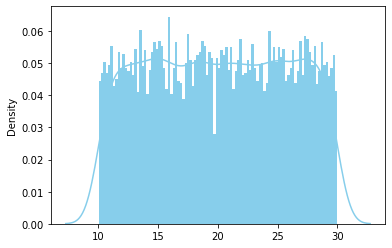

In [3]:
ax = sns.distplot(data_uniform,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth":15,'alpha':1})

**Menyetel label untuk sumbu x dan y**

In [4]:
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')

[Text(0.5, 3.1999999999999993, 'Uniform Distribution '),
 Text(17.200000000000003, 0.5, 'Frequency')]

### Normal Distribution
**Normal Distribution**, juga dikenal sebagai Gaussian distribution. Distribusi ini memiliki kurva kerapatan berbentuk lonceng yang dijelaskan dengan mean dan deviasi standarnya.

**Generate random numbers from N(0,1)**

In [5]:
data_normal = norm.rvs(size=10000, loc=0, scale=1)

**Memvisualisasikan distribusi menggunakan distplot Seaborn**

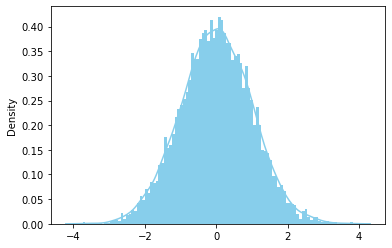

In [6]:
ax = sns.distplot(data_normal,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})

**Menyetel label untuk sumbu x dan y**

In [7]:
ax.set(xlabel='Normal Distribution ', ylabel='Frequency')

[Text(0.5, 3.1999999999999993, 'Normal Distribution '),
 Text(17.200000000000003, 0.5, 'Frequency')]

### Gamma Distribution
**Gamma distribution** adalah two-parameter family dari continous probability distributions.

### Exponential Distribution
**Exponential Distribution** menggambarkan waktu antara peristiwa dalam Poisson point process, yaitu dimana peristiwa terjadi terus menerus dan independen pada tingkat rata-rata yang konstan.

### Poisson Distribution
**Poisson random variabel** biasanya digunakan untuk memodelkan berapa kali suatu peristiwa terjadi dalam interval waktu, misalnya jumlah pengguna yang berkunjung di situs web dalam suatu interval.

### Binomial Distribution
Distribusi dimana hanya dua hasil yang mungkin, seperti sukses atau gagal, untung atau rugi, menang atau kalah dan dimana probabilitas keberhasilan dan kegagalan sama untuk semua percobaan.

### Bernoulli Distribution
**Bernoulli Distribution** hanya memiliki dua kemungkinan hasil, yaitu 1 (berhasil) dan 0 (gagal), dan dalam sekali percobaan, misalnya lemparan koin.

### Confidence Intervals
**Confidence Intervals (CI)** adalah rentang antara dua nilai dimana nilai suatu Sample Mean tepat berada di tengah-tengahnya.

**Membaca dataset**

In [8]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


**Mengubah value kolom sex**

In [9]:
dx = df[['sex', 'target']].dropna()
dx.sex = df.sex.map({1:'Male', 0:'Female'})
dx

,sex,target
0,Male,0
1,Male,0
2,Male,0
3,Male,0
4,Female,0
...,...,...
1020,Male,1
1021,Male,0
1022,Male,0
1023,Female,1


**Menghitung tabulasi silang dari dua (atau lebih) faktor**

In [10]:
pd.crosstab(dx.target, dx.sex)

sex,Female,Male
target,,
0,86,413
1,226,300


**Membuat proporsi**

In [11]:
n = 86 + 226
p_fm = 226 / n
p_fm

0.7243589743589743

**Menghitung standard error**

In [12]:
se_female = np.sqrt(p_fm * (1-p_fm) / n)
se_female

0.02529714756803247

**Menghitung Confidence Interval dari proporsi**

In [13]:
z = 1.96
lb = p_fm - z * se_female
ub = p_fm + z * se_female
print (lb, ub)

0.6747765651256307 0.773941383592318


### Cl with mean

**Melihat nilai mean, std dan size dari chol berdasarkan jenis kelamin**

In [14]:
df.groupby("sex").agg({'chol':[np.mean, np.std, np.size]})

chol                
           mean        std size
sex                            
0    261.455128  64.466781  312
1    239.237027  43.155535  713

**Membuat variabel**

In [15]:
mean_fe = 261.455128
sd_fe = 64.466781
n = 312
z = 1.96

**Menghitung standard error**

In [16]:
se = sd_fe / np.sqrt(n)

**Menghitung Confidence Interval**

In [17]:
lb = mean_fe - z * se
ub = mean_fe + z * se
print (lb, ub)

254.30169095203016 268.6085650479699


### Hypotesis Testing
**Hypotesis Testing** dalam statistik adalah cara kita menguji hasil survei atau eksperimen untuk melihat apakah kita memiliki hasil yang bermakna.

**Membaca data via URL**

In [18]:
url = "https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/nhanes_2015_2016.csv"
df = pd.read_csv(url)

**Melihat 5 data teratas**

In [19]:
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [20]:
males = df[df['RIAGENDR'] == 1]
females = df[df['RIAGENDR'] == 2]

In [21]:
nf = len(females)
muf = females.BMXBMI.mean()
stf = females.BMXBMI.std()

(nf, muf, stf)

(2976, 29.939945652173996, 7.75331880954568)

In [22]:
nm = len(males)
mum = males.BMXBMI.mean()
stm = males.BMXBMI.std()

(nm, mum, stm)

(2759, 28.778072111846985, 6.252567616801485)

In [23]:
sm.stats.ztest(females.BMXBMI.dropna(),
               males.BMXBMI.dropna(),
               alternative='two-sided')

(6.1755933531383205, 6.591544431126401e-10)